# Harsh Sharma

## NLP With Hotel Review Part 2

---

## Table of contents

[__Context to the problem__](#context)<br>

[__EDA__](#part0)<br>


[__Modeling__](#part1)<br>


[__Question 1: Running a logistic regression model__](#Que1)<br>
   *   [1.a: Accuracy of the model](#Que1.a)<br>
   *  [1.b: Top 20 predictive words for the positive and negative review](#Que1.b)<br>
   *   [1.c: Reducing dimensionality by PCA](#Que1.c)<br>
   *  [1.d: Advantages and disadvantages of dimensionality reduction](#Que1.d)<br>
   
[__Question 2: Running a KNN model__](#Que2)<br>
   *   [2.a: Accuracy of the model](#Que2.a)<br>
   *  [2.b: Number of observations v/s run-time for KNN](#Que2.b)<br>
   *   [2.c: Advantage and disadvantage of reducung number of observations](#Que2.c)<br>
   *  [2.d: Optimal value of K](#Que2.d)<br>
   *  [2.e: Issue of splitting into train-validation sets after vectorization](#Que2.e)<br>


[__Question 3: Running a Decision Tree Model__](#Que3)<br>
   *   [3.a: Accuracy of the model](#Que3.a)<br>
   *  [3.b: Optimal max_depth](#Que3.b)<br>
   *   [3.c: Strengths and weeknesses of DT model](#Que3.c)<br>

[__Question 4: Validation set v/s Test set__](#Que4)<br>

[__Question 5: Cross-validation of DT model__](#Que5)<br>
   *   [5.a: 5-fold validation and optimizing hyperparameter](#Que5.a)<br>
   *  [5.b: Confusion matrix of the best model](#Que5.b)<br>
   
[__Question 6__](#Que6)<br>
   *   [6.a: Improving accuracy by feature engineering](#Que6.a)<br>
   *  [6.b: Optimizing hyperparameter and checking final accuracy](#Que6.b)<br>
   
[__Summary__](#summary)<br>

---

### Context to the problem:
<a class ='anchor' id = 'context' ></a>

We have been given a cleaned dataset for the ratings of different hotels in 6 countries in Europe. There are more than 100 hotels and people from all around the world visit here. The data we have is from 3 years and is mostly about details of the specific trip, hotel names and postive and negative reviews given by the customers. Our goal is to some analysis on this data and see what are the factors which affected the rating of the particular trip and the hotel.

---

__Loading all the libraries.__

In [1093]:
# Importing everything we need 
# The usual packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time

#### Load the dataset

In [1094]:
# loading the dataset
hotel_df = pd.read_csv('clean_train_dataframe.csv')

In [1095]:
# loading the dataset
test_df = pd.read_csv('clean_test_dataframe.csv')
test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [1096]:
# check shape
test_df.shape

(4267, 2744)

In [1097]:
# peeking into the dataset
hotel_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


First of all let's check the shape.

In [1098]:
# check shape
hotel_df.shape

(12798, 2744)

In [1099]:
print(f'Our hotel dataframe has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.')

Our hotel dataframe has 12798 rows and 2744 columns.


In [1100]:
# list of object columns
list(hotel_df.select_dtypes(['object']).columns)

[]

So this is cleaned dataset in terms of any text data. All the columns are in the numeric format.

### Basic EDA
<a class ='anchor' id = 'part0' ></a>

#### Checking for the missing data

In [1101]:
# checking duplicated rows for train set
hotel_df.duplicated().sum()

0

In [1102]:
# checking duplicated rows for test set
test_df.duplicated().sum()

0

It's great that there are no rows that are duplicated in the dataset.

Knowing more about the columns present in the dataset as the dictionary is not present.

In [1103]:
# getting a list of all the columns
list(hotel_df.columns)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'days_since_review',
 'lat',
 'lng',
 'weekday_of_review',
 'month_of_review',
 'year_of_review',
 'bed_single',
 'bed_double',
 'bed_queen',
 'bed_king',
 'trip_leisure',
 'trip_biz',
 'group_solo',
 'group_couple',
 'group_family',
 'Hotel_Name_11 Cadogan Gardens',
 'Hotel_Name_41',
 'Hotel_Name_88 Studios',
 'Hotel_Name_Ace Hotel London Shoreditch',
 'Hotel_Name_Adria Boutique Hotel',
 'Hotel_Name_Aloft London Excel',
 'Hotel_Name_Amba Hotel Charing Cross',
 'Hotel_Name_Amba Hotel Marble Arch',
 'Hotel_Name_Ambassadors Bloomsbury',
 'Hotel_Name_Andaz London Liverpool Street',
 'Hotel_Name_Apex City Of London Hotel',
 'Hotel_Name_Apex London Wall Hotel',
 'Hotel_Name_Apex Temple Court Hotel',
 'Hotel_Name_Arbor City',
 'Hotel_Name_Arbor Hyde Park',
 'Hotel_Name_Ashburn Hotel',
 'Hotel

Now let's filter out the columns starting with `p_`

In [1104]:
# assigning a name for the list of columns
filter_col = [col for col in hotel_df if col.startswith('p_')]

In [1105]:
# making a dataframe out of it
p_df = hotel_df[filter_col]
p_df.head()

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_worth,p_would,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy
0,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1106]:
# checking shape
p_df.shape

(12798, 983)

Now let's do it for the columns starting with `n_`

In [1107]:
# assigning a name for the list of columns
filter_col2 = [col for col in hotel_df if col.startswith('n_')]

In [1108]:
# making a dataframe out of it
n_df = hotel_df[filter_col2]
n_df.head()

,n_,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1109]:
# checking shape
n_df.shape

(12798, 1343)

Now let's create different kind of dataframes and peek into them.

In [1110]:
# dataset containing no positive words columns
not_p = hotel_df.loc[:, ~hotel_df.columns.isin(filter_col)]

In [1111]:
# dataset containing neither positive or negative columns
not_n_p = not_p.loc[:, ~not_p.columns.isin(filter_col2)]

In [1112]:
# peeking into the dataframe
not_n_p.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,Hotel_Name_United Lodge Hotel and Apartments,Hotel_Name_W London Leicester Square,Hotel_Name_W12 Rooms,Hotel_Name_Washington Mayfair Hotel,Hotel_Name_Windermere Hotel,Hotel_Name_citizenM London Bankside,Hotel_Name_citizenM London Shoreditch,Hotel_Name_citizenM Tower of London,Hotel_Name_every hotel Piccadilly,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


Now let's what columns are left with us. Main motive to do this to see what columns are there in the dataset and what kind of information do they carry.

In [1113]:
# list of remaining columns
list(not_n_p.columns)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'days_since_review',
 'lat',
 'lng',
 'weekday_of_review',
 'month_of_review',
 'year_of_review',
 'bed_single',
 'bed_double',
 'bed_queen',
 'bed_king',
 'trip_leisure',
 'trip_biz',
 'group_solo',
 'group_couple',
 'group_family',
 'Hotel_Name_11 Cadogan Gardens',
 'Hotel_Name_41',
 'Hotel_Name_88 Studios',
 'Hotel_Name_Ace Hotel London Shoreditch',
 'Hotel_Name_Adria Boutique Hotel',
 'Hotel_Name_Aloft London Excel',
 'Hotel_Name_Amba Hotel Charing Cross',
 'Hotel_Name_Amba Hotel Marble Arch',
 'Hotel_Name_Ambassadors Bloomsbury',
 'Hotel_Name_Andaz London Liverpool Street',
 'Hotel_Name_Apex City Of London Hotel',
 'Hotel_Name_Apex London Wall Hotel',
 'Hotel_Name_Apex Temple Court Hotel',
 'Hotel_Name_Arbor City',
 'Hotel_Name_Arbor Hyde Park',
 'Hotel_Name_Ashburn Hotel',
 'Hotel

Looks like we have one more multiple kinda columns which is Hote_Name_

In [1114]:
# sanity check for the required shape at the end
hotel_df.shape[1] - (n_df.shape[1] + p_df.shape[1])

418

In [1115]:
not_n_p.shape

(12798, 418)

In the above list of columns, there are lot of columns which start with `Hotel_Name_`, basically names of different hotels. So finally let's take these also out and see the remaining columns in the list.

In [1116]:
# assigning a name for the list of columns
filter_col3 = [col for col in hotel_df if col.startswith('Hotel_Name_')]

In [1117]:
# making a new dataframe with no postive words, no negative words and no hotel names
not_new = not_n_p.loc[:, ~not_n_p.columns.isin(filter_col3)]

In [1118]:
# checking shape
not_new.shape

(12798, 22)

Finally there are only 22 columns left. Let's have a look at them.

In [1119]:
# final list
list(not_new.columns)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'days_since_review',
 'lat',
 'lng',
 'weekday_of_review',
 'month_of_review',
 'year_of_review',
 'bed_single',
 'bed_double',
 'bed_queen',
 'bed_king',
 'trip_leisure',
 'trip_biz',
 'group_solo',
 'group_couple',
 'group_family',
 'rating']

In [1120]:
# peeking into the dataframe
not_new.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,bed_single,bed_double,bed_queen,bed_king,trip_leisure,trip_biz,group_solo,group_couple,group_family,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,1,0,0,1,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,1,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,1,0,0,1,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,1,0,0,1,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,1,0,0,0,0


Now we know what columns do we have in the dataset, and it makes much more sense now.

__Let's make a dataset excluding target varibale and one with it.__

In [1121]:
# instantiating our independent and dependent variables 
X_train = hotel_df.drop(columns="rating")
y_train = hotel_df["rating"]

In [1122]:
X_train.shape

(12798, 2743)

In [1123]:
# instantiating our independent and dependent variables 
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

Let' see what is the target variable present in the dataset.

In [1124]:
# peeking into the target column
hotel_df[['rating']].head()

,rating
0,1
1,1
2,1
3,0
4,0


1 means that we have a good rating, and 0 means we have a bad rating.

Let's see the distribution of the target variable.

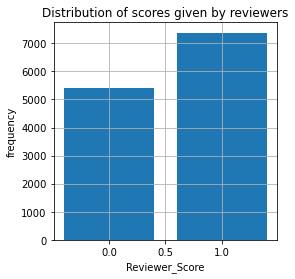

In [1125]:
# plotting distribution
plt.figure(figsize=(4,4))
plt.bar(hotel_df['rating'].value_counts().index,
        hotel_df['rating'].value_counts().values)
plt.xlabel('Reviewer_Score')
plt.ylabel('frequency')
plt.title('Distribution of scores given by reviewers')
plt.grid()
plt.show()

Not that imbalanced, it's good, no assumptions need to made and no changes are required.

There is procedure that needs to be followed before we start modelling. Like there needs to be scaling of the data and performing the test-train split. And most importantly, this has to be in order.

We already have test and train set given differently, so let's scale it now.

#### Scale the data

Let's scale according to the standard scaler.

#### Standard Scaler

In [1126]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

All set let's start modeeling.

### Modeling
<a class ='anchor' id = 'part1' ></a>

In [1127]:
def PlotBoundaries(model, X, Y) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

----

### Question1: Employ a linear classifier on this dataset:
<a class ='anchor' id = 'Que1' ></a>

#### Que1.a Fit a logisitic regression model to this data with the solver set to `lbfgs`. What is the accuracy score on the test set?
<a class ='anchor' id = 'Que1.a' ></a>

Solver equal to `lbfgs` is by default in logistic regression model. `lbfgs` handles any loss of information of all the independent variables while making the model.

In [1128]:
# Fitting a model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Accuracy score of the TRAIN set: {logreg.score(X_train_ss, y_train)}")
print(f"Accuracy score of the TEST set: {logreg.score(X_test_ss, y_test)}")

Accuracy score of the TRAIN set: 0.885841537740272
Accuracy score of the TEST set: 0.7328333723927818


The test score is very low relative to the train score. This is case when there is __overfitting.__

There can be many reasons why the model is overfiiting. First of all we did not check any of the assumptions before running the regression model, like checking if there is no multi-collinearity among the features present in the training set. 


So basically, these numbers are going to change when features are removed which have high multicollinearity or high variance towards the predicted results. 

---

#### Que1.b What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question
<a class ='anchor' id = 'Que1.b' ></a>

Let's first calculate the coefficients of all the `positive_review` columns and `negative_columns` to see their respectives influences in determining the target variable, i.e., `rating`.


Also, as there are more columns which excluding the positive and the negative ones, so it's obvious that the sum of coeeficients would not be 1.

In [1129]:
# coefficients of all the dataset
logreg.coef_

array([[-0.02277657,  0.47911974,  0.29770842, ...,  0.1274375 ,
        -0.02013651,  0.01217388]])

Let's first filter out the solumns which start from p_, which means that extract all the columns which were made during countvectorizing of the `Positive_Review` column.

In [1130]:
# making coef dataframe
coef_df = pd.DataFrame({'category':X_train.columns, 'coef':logreg.coef_[0]}).sort_values(by = 'coef', ascending = False).set_index('category')

In [1131]:
# taking transpose
coef2_df = coef_df.T

Now, we have take out the only columns which start with p_ and n_ antake the highest 20 coefficients for both of them.

In [1132]:
# assigning a name for the list of columns
filter_col = [col for col in coef2_df if col.startswith('p_')]

In [1133]:
# making positive words dataset against coeffiecients
positive_df = coef2_df[filter_col].T

In [1134]:
# peeking
positive_df.head(20)

,coef
category,
p_gift,0.544396
p_excellent,0.517329
p_incredible,0.450510
p_exceed,0.401123
p_impeccable,0.398893
p_everything,0.374332
p_hair,0.350055
p_great,0.348852
p_staff,0.348552


Now let's make the graph with the highest coefficients.

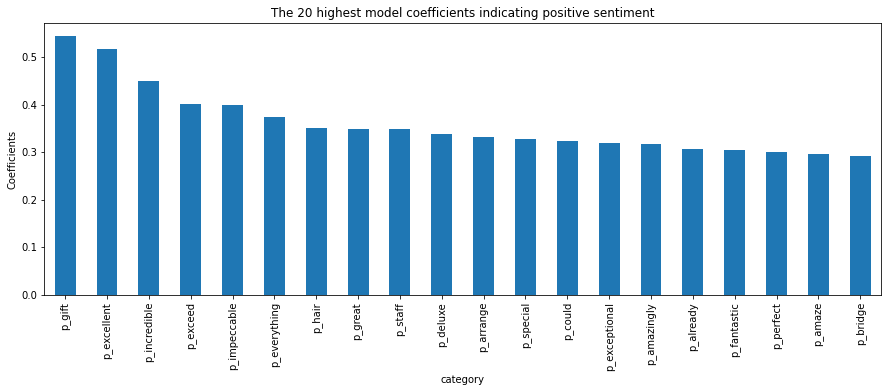

In [1135]:
# bar graph showing top columns with with highest coefficients
positive_df.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

From above it can be interpreted that is there are words like __"gift", "excellent", "incredile"__ and so on in the postive review column then there are more chances the review is GOOD or rating is 1.

Now let's do the same thing for the __columns of negative words__ 

In [1136]:
# assigning a name for the list of columns
filter_col = [col for col in coef2_df if col.startswith('n_')]

In [1137]:
# making a separate dataframe
negative_df = coef2_df[filter_col].T

In [1139]:
# peeking into top 20 rows
negative_df.head(20)

,coef
category,
n_inn,0.706438
n_nothing,0.360514
n_height,0.351939
n_tricky,0.341887
n_criticism,0.326099
n_wonderful,0.315765
n_assume,0.249266
n_complain,0.241568
n_join,0.238275


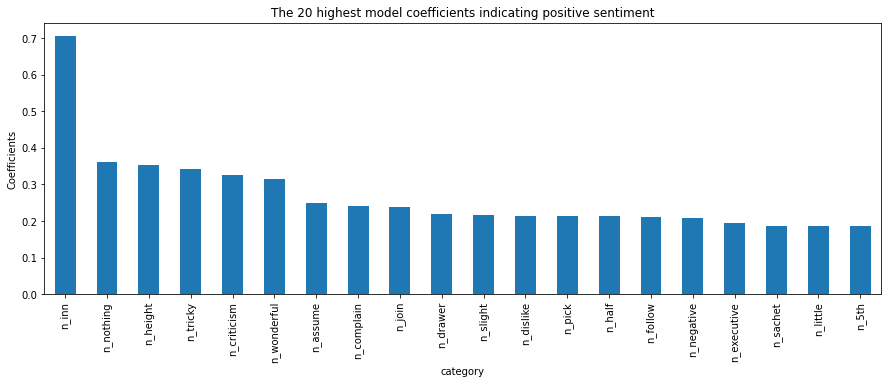

In [1138]:
# bar graph showing the top highest negative words predicting the review to be negative
negative_df.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

From above it can be seen that if the words like __"inn", "nothing", "height"__ and so on are present in the negative review column then there are more chances that the review is BAD or the rating is 0.

---

#### 1.c Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?
<a class ='anchor' id = 'Que1.c' ></a>

Here is the high level modelling process we will follow:

   1. Load data and split into `X` (features) and `y` (target)
   2. Train test split
   3. Fit scaler to `X_train`, transform `X_train` and `X_test`
   4. **Fit PCA object to _scaled_ `X_train`, transform _scaled_ `X_train` and `X_test`**
   5. Fit model on PCA-transformed `X_train`, score on transformed `X_train` and `X_test`.
   
The process of fitting PCA on the data is very similar to that of scaling the data. You fit the PCA transformer on the **training set only** to prevent data leakage.

In [1140]:
# PCA import statement
from sklearn.decomposition import PCA 

In [1141]:
# Instantiate & fit PCA model to the breast cancer data
# Default n_components will generate the same number of PCs as you have features 
my_PCA = PCA()
my_PCA.fit(X_train_ss)

# transform data 
X_train_PCA = my_PCA.transform(X_train_ss)
X_test_PCA = my_PCA.transform(X_test_ss)

In [1142]:
# variance defined by first 2 PC's, just peeking into them
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  20.884
Variance captured by PC2:  12.925
Proportion of variance captured by PC1:  0.008
Proportion of variance captured by PC2:  0.005


In [1143]:
# calculating variance RATIO of all PC's
my_PCA.explained_variance_ratio_

array([7.63785922e-03, 4.72719774e-03, 2.18023902e-03, ...,
       3.13263881e-36, 1.60938375e-36, 5.69116906e-37])

In [1144]:
# calculating variance of all PC's
my_PCA.explained_variance_

array([2.08835389e+01, 1.29251686e+01, 5.96123926e+00, ...,
       8.56530379e-33, 4.40039900e-33, 1.55608721e-33])

The values given to us in `explained_variance_` are not very interpretable. But the values given in `explained_variance_ratio_` can be interpreted as the following:

* 0.76% of the variation in the data is seen in the direction of the first PC
* 0.47% of the variation in the data is seen in the direction of the second PC

We can now follow one of two methods to pick our 'optimal' number of PCs.

___And sum of all the variance ratios by all the PC's should be equal to 1, as it's basically a mere percentage of ratios.___

In [1145]:
# assigning name to ratio
expl_var = my_PCA.explained_variance_ratio_

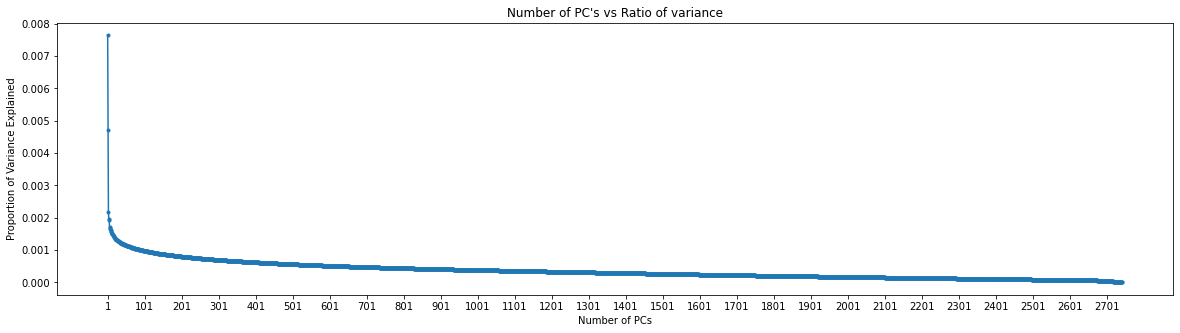

In [1146]:
# plotting a graph for the PC and proportional variance
plt.figure(figsize=(20,5))
plt.plot(range(1,2744),expl_var,marker='.')
plt.xticks(range(1,2744,100))
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title("Number of PC's vs Ratio of variance")
plt.show()

The above graph definately makes a elbow but it's not clear how many PC's really cover most proportion of the variance. So let's try out by another method.

In [1147]:
# Pull out the explained variance ratio
expl_var = my_PCA.explained_variance_ratio_

# Calculate the cumulative sum of this array using the 
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.00763786, 0.01236506, 0.0145453 , ..., 1.        , 1.        ,
       1.        ])

As explained from above that the sum of all the proportions of all the variances should be equal to one, similar can be proved from above. `np.cumsum` keeps on adding elements in an array alomg the same axis one after the other. 


The target here is to take out the PC's which explain the most variance in the data and drop rest of them. This for sure will degrade the quality of data, but will help prevent overfitting on the model.


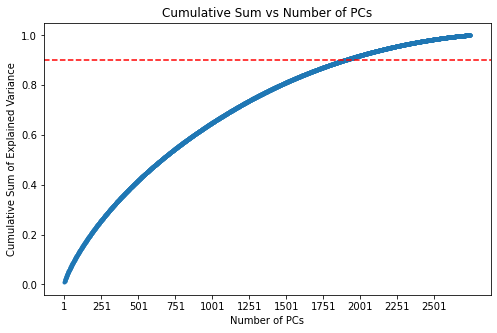

In [1148]:
# Plot out the cumulative sum graph
plt.figure(figsize=(8,5))
plt.plot(range(1,2744), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--') #keeping 90% threshhold of the explained variance
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.title('Cumulative Sum vs Number of PCs')
plt.xticks(range(1,2744,250))
plt.show()

A bit unclear from the above graph about what should be the number of PC.

In [1149]:
# function for calling the maximum PCs at the 90% threshhold
np.argmax(cumulative_sum >= 0.90)

1890

So there are 1890 PC's which explain 90% of the variance in the data.

Let's fit this into the model and then calculate the accuracy.

In [1150]:
# Instantiate and fit
my_PCA = PCA(n_components = np.argmax(cumulative_sum >= 0.90))
my_PCA.fit(X_train_ss)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_ss)
X_test_PCA = my_PCA.transform(X_test_ss)

In [1151]:
# let's check the shapes (sanity check)
print(f'Original: {X_train_ss.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (12798, 2743)
PCA Transformed: (12798, 1890)


Now let's fit this into our logistic regression model.

In [1152]:
# Do the same but fit on the PCA transformed data
my_logreg_PCA = LogisticRegression(solver='lbfgs', max_iter = 1000)

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score: {my_logreg_PCA.score(X_test_PCA, y_test)}')


Train Score: 0.8534927332395686
Test Score: 0.7656433091164753


We can see there is still overfitting of the model on the data.

Let's decrease the threshhold of the explained variance and then measure the accuracy.

In [1153]:
# function for calling the maximum PCs at the 90% threshhold
np.argmax(cumulative_sum >= 0.75)

1287

In [1154]:
# Instantiate and fit
my_PCA = PCA(n_components = np.argmax(cumulative_sum >= 0.75))
my_PCA.fit(X_train_ss)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_ss)
X_test_PCA = my_PCA.transform(X_test_ss)

Now we have tranformed the sets according to PCA, let's run the model.

In [1155]:
# Do the same but fit on the PCA transformed data
my_logreg_PCA = LogisticRegression(solver='lbfgs', max_iter = 1000)

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score: {my_logreg_PCA.score(X_test_PCA, y_test)}')

Train Score: 0.831301765900922
Test Score: 0.7733770799156315


From above it can be seen that with decresing number of PCs to 1287, it has fairly decreased the overfitting of the model. Now let's compare it with the model where all variances were present of all features.

In [1156]:
# Fitting a model
logreg = LogisticRegression(solver='lbfgs', max_iter = 1000)
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Accuracy score of the TRAIN set: {logreg.score(X_train_ss, y_train)}")
print(f"Accuracy score of the TEST set: {logreg.score(X_test_ss, y_test)}")

Accuracy score of the TRAIN set: 0.885841537740272
Accuracy score of the TEST set: 0.7328333723927818


Congrats, we have increased the accuracy of the model by reducing features using PCs!!

#### Relationship between runtime for a logistic regression and number of dimensions.

In [1157]:
%%timeit
my_logreg.fit(X_train_ss, y_train)

3.1 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1158]:
%%timeit
my_logreg_PCA.fit(X_train_PCA,y_train)

560 ms ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


From above we can see that time of fitting the model has decreased by reducing the number of dimensions. Let's plot them and get a better understanding.


A function can be created to draw a graph between number of dimensions and runtime.

---

Alterations need to be done in the following function. It takes size as the input but should take n_components as input ans=d iterate over a range of values.

In [1228]:
from sklearn.utils import resample

In [1232]:
def data_size_scaling(my_logreg_PCA, X_train_PCA, sizes=[100, 200, 400, 800, 1600], n_runs=5):
    result = []
    for size in sizes:
        for run in range(n_runs):
            subsample = resample(X_train_PCA, n_samples=size)
            start_time = time.time()
            my_logreg_PCA.fit(subsample)
            elapsed_time = time.time() - start_time
            del subsample
            result.append((size, elapsed_time))
    return pd.DataFrame(result, columns=('dataset size', 'runtime (s)'))

In [1235]:
all_algorithms = [
    PCA(),
]
performance_data = {}
for algorithm in all_algorithms:
    alg_name = str(algorithm)
    if 'MulticoreTSNE' in alg_name:
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = alg_name.split('(')[0]

    performance_data[alg_name] = data_size_scaling(algorithm, X_train_PCA, n_runs=3)

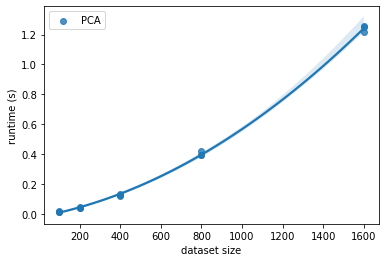

In [1236]:
for alg_name, perf_data in performance_data.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2, label=alg_name)
plt.legend();

Anyways, runtime should increase with the increase in number of dimensions in the train set.

---

#### 1.d List one advantage and one disadvantage of dimensionality reduction
<a class ='anchor' id = 'Que1.d' ></a>

* Advantage and disadvantage of dimensionality reduction:

__Advantage:__ As can be seen from the computation speed decreased when we use PCA to reduce dimensions which means it __reduces the time period a model needs to run.__ Secondly, it selects the features which have the almost the same variance as the original data, which means it helps to reduce the number of features and the concept of __multicollinearity is also prevented__. Not having multicollinearity is one of first assumptions while running regression models. Lastly, __it prevents overfitting__ of the model on the data.

__Disadvantage:__ Reducing the number of dimensions which do not have much contribution to the performance or result of the model are undoubtedly dropped, but whatever __little information it was carrying with it is gone__ while reduction. This would make the result of the model slightly optimistic but at the same time reduce multi-collinearity also. However, if a dimension is dropped, which could have been made exactly same with other dimensions, then by dropping that dimension does not result in any information loss. But these kind of features are very rare. 

---

---

### Question 2: Employ a K-Nearest Neighbour classifier on this dataset:
<a class ='anchor' id = 'Que2' ></a>

In [1159]:
# loading the train dataset
hotel_df = pd.read_csv('clean_train_dataframe.csv')

In [1160]:
# loading the test dataset
test_df = pd.read_csv('clean_test_dataframe.csv')

In [1161]:
# instantiating our independent and dependent variables 
X_train = hotel_df.drop(columns="rating")
y_train = hotel_df["rating"]

In [1162]:
# instantiating our independent and dependent variables 
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

Since we are dealing with KNN model which calculates the distance between the points, scaling is important before we make model.

#### Standard Scaler

In [1163]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

#### 2.a Fit a KNN model to this data. What is the accuracy score on the test set?
<a class ='anchor' id = 'Que2.a' ></a>

In [1164]:
from sklearn.metrics import accuracy_score

__Note:__ As KNN model deals with the distance of the data points, so it's necessary to use __the scaled train set while running the model.__

By default, number of neighbors in the classifier is 5, same as below.

The model below takes a lot of time, as we classifying the whole ~12k rows of the dataset.

In [1165]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_ss, y_train)

# Score the model on the test set
test_predictions = KNN_model.predict(X_test_ss)

test_accuracy = accuracy_score(test_predictions, y_test)

train_predictions = KNN_model.predict(X_train_ss)

train_accuracy = accuracy_score(train_predictions, y_train)

print(f"Test set accuracy: {test_accuracy}")
print(f"Train set accuracy: {train_accuracy}")

Test set accuracy: 0.6367471291305367
Train set accuracy: 0.751211126738553


__Overfitting can be seen__ from the above model as the difference between the accuaracy of train set and test set is huge.

Let's see how much time does it take to run.

In [1166]:
%%timeit
KNN_model.fit(X_train_ss, y_train)

30.5 ms ± 619 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Overfitting can be seen here too, alot but I think better than Logistic regression.


Above function takes a very long time which was expected as train and test sets are huge.

Let's reduce the size of the dataset and then see the relation between the size of the dataset and the run-time. By this we can have really good conclutions.

---

#### 2.b KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?
<a class ='anchor' id = 'Que2.b' ></a>

As we have see that KNN classifier takes a lot of time to run, the optimal way to prevent this to take a subset out of the main dataset.

In [1237]:
# takeing 60% sample from the dataset
hotel2_df = hotel_df.sample(frac=0.6, random_state=1)

In [1238]:
# checking shape
hotel_df.shape

(12798, 2744)

In [1239]:
# checking shape 
hotel2_df.shape

(7679, 2744)

Let's define independent and dependent variable for this new `hotel2_df` dataset.

In [1240]:
# instantiating our independent and dependent variables on train set
X_train = hotel2_df.drop(columns="rating")
y_train = hotel2_df["rating"]

In [1241]:
# instantiating our independent and dependent variables on test set
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

Basically we have to repeat the steps as we have done in the previous question and thus, scale the data before fitting the model.

In [1242]:
# scale the data 
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

Now, finally let's make the model.

In [1243]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_ss, y_train)

# Score the model on the test set
test_predictions = KNN_model.predict(X_test_ss)

test_accuracy = accuracy_score(test_predictions, y_test)

train_predictions = KNN_model.predict(X_train_ss)

train_accuracy = accuracy_score(train_predictions, y_train)

print(f"Test set accuracy: {test_accuracy}")
print(f"Train set accuracy: {train_accuracy}")

Test set accuracy: 0.6416686196390907
Train set accuracy: 0.7491860919390546


After taking a fraction out of the main dataframe test accuracy has increased to small extent, but this was not our target to achieve, it should be almost same anyways, if the distribution is same.

Now let's see how much time does it take for KNN model to run on 60% of the total dataset.

In [1244]:
%%timeit
KNN_model.fit(X_train_ss, y_train)

49.2 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


As expected the runtime has decreased in case of running KNN with a smaller set of data as of the original data.



It was in seconds before and now it's in milli (10^(-3)) seconds, it has decreased a lot.

So as expected that smaller the size of the dataset, less time KNN classifer model takes to run on the training set. On the backend, less are number of points in the data space, less are the computations and calculations of distances between the new point and existing points and less is the time taken by the model to fit the data and vice versa.

Below function can be used to grapg between sample size and runtime of KNN. Some alterations need to be done to change sizes one by one of both X_train_ss and y_train in a loop simultaneously.

In [1265]:
def data_size_scaling(KNN_model, X_train_ss, y_train, sizes=[7679], n_runs=5):
    result = []
    for size in sizes:
        for run in range(n_runs):
            subsample = resample(X_train_ss, n_samples=size)
            start_time = time.time()
            KNN_model.fit(subsample, y_train)
            elapsed_time = time.time() - start_time
            del subsample
            result.append((size, elapsed_time))
    return pd.DataFrame(result, columns=('dataset size', 'runtime (s)'))

In [1267]:
all_algorithms = [
    PCA(),
]
performance_data = {}
for algorithm in all_algorithms:
    alg_name = str(algorithm)
    if 'MulticoreTSNE' in alg_name:
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = alg_name.split('(')[0]

    performance_data[alg_name] = data_size_scaling(KNN_model, X_train_ss, y_train, n_runs=3)

''

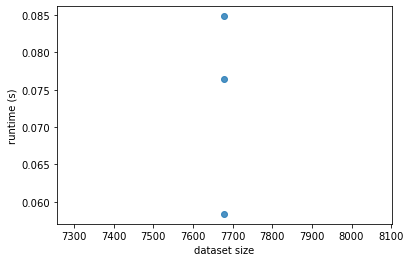

In [1268]:
for alg_name, perf_data in performance_data.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2)
;

Just for one sample size, is not success :{

---

#### 2.c List one advantage and one disadvantage of reducing the number of observations.
<a class ='anchor' id = 'Que2.c' ></a>

__Advantage:__ Decreasing the data points will decrease the number of calculations of distances between the new point and existing points which eventually __decrease the time of running the model__ in the backend.

__Disadvantage:__ ___Loss of information___ occurs to some extent while reducing the size of the dataset which affects the performance of the model.


Also `Dataframe.sample` does not care about the distribution of the sub-dataset and dataset. Unfortunately `stratify` cannot be used in this function and randomly chooses the fraction of rows we want. However, to avoid this train-test split can be done with `stratify`.

---

#### 2.d Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.
<a class ='anchor' id = 'Que2.d' ></a>

#### Splitting the dataset

In [1175]:
# checking shape
X_train.shape

(7679, 2743)

In [1176]:
# checking shape
y_train.shape

(7679,)

__Note:__ As splitting of the train set is required into remainder and validation sets, original ___unscaled Xtrain___ is used for splitting into 2 sets to prevent the leakage of the data amongst the 2 splitted sets.

In [1177]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_remainder, X_validation, y_remainder, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=1, stratify=y_train)

Now, after splitting let's scale the data for our KNN model.

Note: We are still using subset of the main dataset to optimize the value of the hyperparameter.

#### Scaling the dataset

In [1178]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_remainder_ss = SS.fit_transform(X_remainder)
X_validation_ss = SS.transform(X_validation)

By random choice let's choose the range of the k-nearest neighbors to be limited to 100, as can be seen below. 


Reason for this is because more are number of k's model takes more time to run and it makes no sense.

In [1179]:
n_neighbors = range(1, 100, 2)
# range is a list iterator
# [0] = working in the first dimension of the array
# 2 = step size so only odd numbers appear

remainder_acc = []
validation_acc = []

for n in n_neighbors: 
    print(f"Working on my model with {n} neighbors...", end="\r")
    
    #Instantiate and fit
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_remainder_ss, y_remainder)
    
    #Score model
    remainder_accuracy = KNN_model.score(X_remainder_ss, y_remainder)
    validation_accuracy = KNN_model.score(X_validation_ss, y_validation)
    
    #Append accurary
    remainder_acc.append(remainder_accuracy)
    validation_acc.append(validation_accuracy)

Now our model is ready and let's visualise the performance on remainder and validation sets.

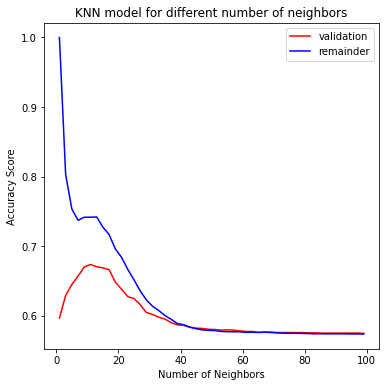

In [1180]:
#plot the graph
plt.figure(figsize=(6,6))
plt.plot(n_neighbors, validation_acc, color="red", label="validation")
plt.plot(n_neighbors, remainder_acc, color="blue", label="remainder")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neighbors")
plt.title("KNN model for different number of neighbors")
plt.legend()
plt.show()

__Observation:__
- we see heavy overfitting for small values of k (below 10);
- the best values when train and test accuracy are close and test is maximal are __around k=12..17__ (there is some variation there);
- for higher values of k, both train and test accuracy drops significantly and approach to almost 50% accuracy

Best k cannot be find with the above graph as it is very unclear.


Let's see what is the optimal value of k in the range of 1 to 99 neighbors.

In [1181]:
#trick to estimate the ideal k value: 

#index the value that is the largest in the test accuracy
index_of_max = np.argmax(validation_acc)

#print the corresponding k value
best_k = n_neighbors[index_of_max]

best_k

11

We can see visually also that the k=11 is the best number of neighbors when we have the maximum accuracy for the validation set.

Let's try running accuracy for the test set with k=11.

In [1182]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train_ss, y_train)

# Score the model on the test set
test_predictions = KNN_model.predict(X_test_ss)

test_accuracy = accuracy_score(test_predictions, y_test)

train_predictions = KNN_model.predict(X_train_ss)

train_accuracy = accuracy_score(train_predictions, y_train)

print(f"Test set accuracy: {test_accuracy}")
print(f"Train set accuracy: {train_accuracy}")

Test set accuracy: 0.6714319193812983
Train set accuracy: 0.7318661284021357


From above we can see that we have improved the time period of the model to fit and also increased the accuracy by almost ~4%.

__Important:__ So basically from the above model we can see that there is no overfitting of the model on the data. What made this possible?? It's the k value which is limited now and is limiting the multi-collinearity also.


So, the point is it's not always necessary to decrease the features by PCA or selecting features by KBest or dropping columns by forward and backward approach. It's just that while running the model use the right hyperparameter and parameter while fitting the model.

Let's see if there is any change in runtime of the model from before. But it is expected that it should decrease as the number of neighbors is limited in this case.

In [1183]:
%%timeit
KNN_model.fit(X_train_ss, y_train)

18.3 ms ± 452 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Yes, runtime has descresed from before.

But this model was run on the 60% of the whole dataset. Let's see the accuracy score on the whole dataset.

In [1184]:
# instantiating our independent and dependent variables on train set
X_train = hotel_df.drop(columns="rating")
y_train = hotel_df["rating"]

In [1185]:
# instantiating our independent and dependent variables on train set
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

In [1186]:
# scale the data 
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

In [1187]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train_ss, y_train)

# Score the model on the test set
test_predictions = KNN_model.predict(X_test_ss)

test_accuracy = accuracy_score(test_predictions, y_test)

train_predictions = KNN_model.predict(X_train_ss)

train_accuracy = accuracy_score(train_predictions, y_train)

print(f"Test set accuracy: {test_accuracy}")
print(f"Train set accuracy: {train_accuracy}")

Test set accuracy: 0.6625263651277244
Train set accuracy: 0.7205032036255665


Accuracies are quite same but I would consider this slightly overfitting for k_neigbors equal to 11.

__So we have achieved 66.2% accuracy with the KNN model.__

---

#### 2.e What is the issue with splitting the data into train and validation sets after performing vectorization?
<a class ='anchor' id = 'Que2.e' ></a>

There is __data leakage__ between the remainder and validation sets when vectorization is done before the test-train split. Some of the information gets transfered between the train and validation sets if vectorization is done prior to the split.

---

---

### Question 3: Employ a Decision Tree classifier on this dataset:
<a class ='anchor' id = 'Que3' ></a>

In [1188]:
# loading the train dataset
hotel_df = pd.read_csv('clean_train_dataframe.csv')

In [1189]:
# loading the test dataset
test_df = pd.read_csv('clean_test_dataframe.csv')

In [1190]:
# instantiating our independent and dependent variables 
X_train = hotel_df.drop(columns="rating")
y_train = hotel_df["rating"]

In [1191]:
# instantiating our independent and dependent variables 
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

#### 3.a Fit a decision tree model to this data. What is the accuracy score on the test set?
<a class ='anchor' id = 'Que3.a' ></a>

Since the model results do not change either __we scale the data or not__, so let's make the model without scaling the independent variables.

In [1192]:
# running a decision tree model
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)

print(f"DT accuracy score on training set: {DTmodel.score(X_train, y_train):0.3f}")
print(f"DT accuracy score on test set: {DTmodel.score(X_test, y_test):0.3f}")

DT accuracy score on training set: 1.000
DT accuracy score on test set: 0.697


Decision tree model __highly overfits__ the data which is not a good sign. A good combination of parameter and hyperparameter is required to optimize and perfectly fit the model.


One more thing to note is that DT classifier model generally overfits when the dataset is quite huge, like in this case.

---

#### 3.b Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.
<a class ='anchor' id = 'Que3.b' ></a>

In [1193]:
# takeing 60% sample from the dataset
hotel2_df = hotel_df.sample(frac=0.6, random_state=1)

In [1194]:
# checking shape 
hotel2_df.shape

(7679, 2744)

In [1195]:
# instantiating our independent and dependent variables on train set
X_train = hotel2_df.drop(columns="rating")
y_train = hotel2_df["rating"]

In [1196]:
# instantiating our independent and dependent variables on test set
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

Let's split the data into remainder and validation sets.

In [1197]:
# splitting our data into remainder and validation sets
from sklearn.model_selection import train_test_split

X_remainder, X_validation, y_remainder, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=1, stratify=y_train)

In [1198]:
import warnings
warnings.filterwarnings('ignore')

In [1199]:
# iterating over a range of hyperparameters
scores = pd.DataFrame()

depth_range = 21

for max_depth in range(1, depth_range):
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_remainder, y_remainder)
    
    # Scoring
    remainder_score = dt_model.score(X_remainder, y_remainder)
    validation_score = dt_model.score(X_validation, y_validation)
    

    scores = scores.append({'Depth': max_depth, 'Remainder Score': remainder_score, 'Validation Score': validation_score}, ignore_index=True)
    
best_score = scores['Validation Score'].max()

print("My best score is:", best_score)
print(scores[scores['Validation Score'] == best_score])

My best score is: 0.7384615384615385
   Depth  Remainder Score  Validation Score
4    5.0         0.762247          0.738462


The range of the `max_depth`, that is, 21 is good in this case as after `max_depth` of 7, model starts highly overfitting the data as can be seen from the below graph. The accuracy scores of both the sets become wider and wider with increase in value of `max_depth` 

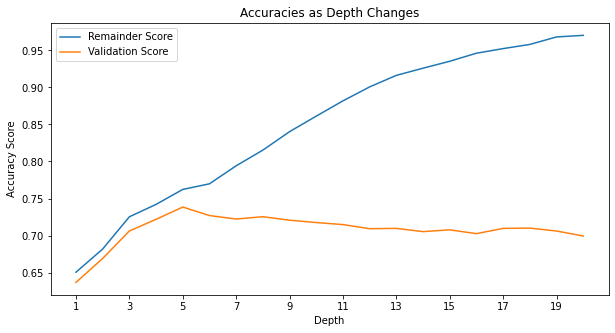

In [1200]:
# comparison plot
plt.figure(figsize=(10,5))
plt.plot('Depth', 'Remainder Score', data=scores)
plt.plot('Depth', 'Validation Score', data=scores)
plt.title('Accuracies as Depth Changes')
plt.xlabel('Depth')
plt.xticks(range(1,depth_range, 2))
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

As we can interpret from the above graph that optimal `max_depth` is 5 and score for validation set is also just below the remainder set, which means that this model fits perfectly to the data.

Let's calculate the accuracy on the decision tree model when `max_depth` = 5

In [1201]:
# running a decision tree model
DTmodel = DecisionTreeClassifier(max_depth=5)
DTmodel.fit(X_train, y_train)

print(f"DT accuracy score on training set: {DTmodel.score(X_train, y_train):0.3f}")
print(f"DT accuracy score on test set: {DTmodel.score(X_test, y_test):0.3f}")

DT accuracy score on training set: 0.761
DT accuracy score on test set: 0.743


From above we can see that accuracy of the model has increased and it also is not overfitting the data.

Let's see how much time does the decision tree model takes to run.

In [1202]:
%%timeit
DTmodel.fit(X_train, y_train)

397 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Let's run the model on the original dataset now.

In [1203]:
# instantiating our independent and dependent variables on train set
X_train = hotel_df.drop(columns="rating")
y_train = hotel_df["rating"]

In [1204]:
# running a decision tree model
DTmodel = DecisionTreeClassifier(max_depth=5)
DTmodel.fit(X_train, y_train)

print(f"DT accuracy score on training set: {DTmodel.score(X_train, y_train):0.3f}")
print(f"DT accuracy score on test set: {DTmodel.score(X_test, y_test):0.3f}")

DT accuracy score on training set: 0.755
DT accuracy score on test set: 0.740


So by decision tree model we got the __accuracy of 74%__ and there are no chances of overfitting at all.

In [1205]:
%%timeit
DTmodel.fit(X_train, y_train)

697 ms ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---

#### Question 3.c Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)
<a class ='anchor' id = 'Que3.c' ></a>

__Advantages:__ 
1. As we have that KNN model is computational extensive model and thus takes a lot of time to run, whereas Decision Tree is relatively much faster.


2. Decision Tree model works in a way that it goes point by point and then keeps on classifying whereas in KNN, unit distance is measured between points, which means that data should be scaled for KNN. However, decision tree model does not require this condition.

__Weeknesses of Decision tress:__
1. Decision trees performs very poorly in terms of classification trees as it mostly overfits the data


2. Tree structure prone to sampling – While Decision Trees are generally robust to outliers, due to their tendency to overfit, they are prone to sampling errors. If sampled training data is somewhat different than evaluation or scoring data, then Decision Trees tend not to produce great results.


3. It can't be used in big data: If the size of data is too big, then one single tree may grow a lot of nodes which might result in complexity and leads to overfitting. There is no guarantee to return the 100% efficient decision tree.

4. They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree. They are often relatively inaccurate. Many other predictors perform better with similar data.

---

---

### Question 4: What is the purpose of the validation set, i.e., how is it different than the test set?
<a class ='anchor' id = 'Que4' ></a>

1. **Validation**: Used to tune a model's hyperparameters, such as the regularization penalty in logistic regression. This serves as a somewhat unbiased estimate of the model's performance. Since the model is not fitted on this data it should not overfit when using the `fit` parameter to it. But since we are adjusting the hyperparameters on this set we still implicitly overfit to it.
2. **Test**: Used to provide a totally unbiased estimate of the model's performance. This is data the model has never seen; it should serve as a good predictor for the model's performance once deployed and making prediction on new data.


<img src = "http://drive.google.com/uc?export=view&id=1qUP76zVM-zyePrTcl3PGVefNBTfVKWWw" width = 500>
<center> <i><a href="https://miro.medium.com/max/1400/1*Nv2NNALuokZEcV6hYEHdGA.png">Image Source</a></i></center>


---


---

### Question 5: Re-run a decision tree or logistic regression on the data again:
<a class ='anchor' id = 'Que5' ></a>

#### Question 5.a Perform a 5-fold cross validation to optimize the hyperparameters of your model.
<a class ='anchor' id = 'Que5.a' ></a>

Do scaling here first, then implement the model.


In [1221]:
# takeing 60% sample from the dataset
hotel2_df = hotel_df.sample(frac=0.6, random_state=1)

In [1222]:
# instantiating our independent and dependent variables 
X_train = hotel2_df.drop(columns="rating")
y_train = hotel2_df["rating"]

In [1223]:
# instantiating our independent and dependent variables 
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

In [1209]:
X_remainder, X_validation, y_remainder, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)

In [1210]:
# scale the data 
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_remainder_ss = SS.fit_transform(X_remainder)
X_validation_ss = SS.transform(X_validation)

Now our reminder and validation sets are scaled, let's find the best hypermeters for our logistic regression model.

In [1211]:
from sklearn.model_selection import cross_val_score

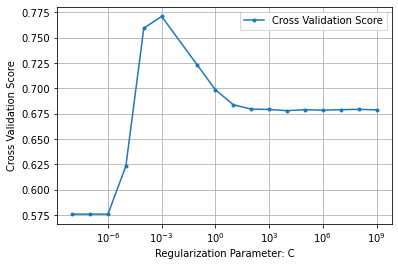

In [1212]:
#Store the results
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder_ss, y_remainder, cv = 5))
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

Best C: 0.001

Now let's test this on the main dataset and check the accuracy on the test set.

In [1213]:
# instantiating our independent and dependent variables 
X_train = hotel_df.drop(columns="rating")
y_train = hotel_df["rating"]

In [1214]:
# scale the data 
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

In [1215]:
# Fitting a model with C=0.001
logreg = LogisticRegression(solver='lbfgs', C=0.001)
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Accuracy score of the TRAIN set: {logreg.score(X_train_ss, y_train)}")
print(f"Accuracy score of the TEST set: {logreg.score(X_test_ss, y_test)}")

Accuracy score of the TRAIN set: 0.8537271448663853
Accuracy score of the TEST set: 0.777595500351535


Little bit of overfitting can be seen from thr above result, however this is the best accuracy achieved with the logreg model.

---

#### Another way of doing the problem but this has a lot of runtime

In [1216]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA

In [1224]:
# Create placeholders for all three steps
estimators = [
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()), # NOTE: You can't use TSNE here since it doesn't have a .transform method
    ('model', DecisionTreeClassifier())
]

my_pipe = Pipeline(estimators)

The following program has a lot of runtime.

In [1226]:
param_grid = [
    {
        'model': [DecisionTreeClassifier()], 
        'model__max_depth': [5, 6, 7],
        'model__min_samples_leaf': [2, 10],
        'dim_reducer__n_components': [2, 3, 4],
        'model__min_samples_split': [2, 3],
        'model__min_weight_fraction_leaf': [0.0],
        'model__max_features': ["auto", "sqrt", "log2"]
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [1219]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=3)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=2))])

In [1220]:
# Best hyperparameters
fittedgrid.best_params_

{'dim_reducer__n_components': 3,
 'model': DecisionTreeClassifier(max_depth=6, min_samples_leaf=2),
 'model__max_depth': 6,
 'model__min_samples_leaf': 2}

The above function returns best `max_depth` for the decision tree model using 5 fold cross validation.

---

---

#### Question 5.b What does your confusion matrix look like for your best model on the test set?
<a class ='anchor' id = 'Que5.b' ></a>

Let's make a confusion matrix with the logreg model which had C=0.001

In [961]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Get class predictions
y_train_pred = logreg.predict(X_train_ss)
y_test_pred = logreg.predict(X_test_ss)

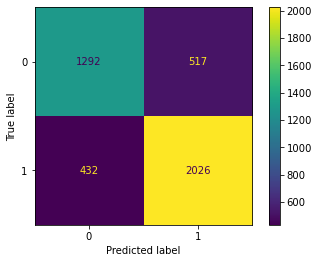

In [1090]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

Let's interpret these numbers, specifically the first row of the confusion matrix first:
* **TN**: The vast majority of data points are from class 0 that were correctly predicted as BAD rating 
* **FP**: There was a small number of reviews that we incorrectly classified as GOOD rating

Let's interpret these numbers, specifically the first row of the confusion matrix first:
* **FN**: There was a small number of reviews that we incorrectly classified as BAD rating 
* **TP**: The vast majority of data points are from class 1 that were correctly predicted as GOOD rating

In [1092]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1809
           1       0.80      0.82      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



---

---

### Question 6: Create one new feature of your choice:
<a class ='anchor' id = 'Que6' ></a>

#### Question 6.a Explain your new feature and why you consider it will improve accuracy.
<a class ='anchor' id = 'Que6.a' ></a>

In [1027]:
# peeking into the columns which could be played with
list(not_new.columns)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'days_since_review',
 'lat',
 'lng',
 'weekday_of_review',
 'month_of_review',
 'year_of_review',
 'bed_single',
 'bed_double',
 'bed_queen',
 'bed_king',
 'trip_leisure',
 'trip_biz',
 'group_solo',
 'group_couple',
 'group_family',
 'rating']

There can be lot of features that can be created from the ones shown above. Starting from the last, we have our dependent variable, then there are 9 tags columns and so on. 

One important thong that is to be considered is that feature engineering does not make a feature out of nowhere. Features are made with the available material we have. But to improve the accuracy of the model, a direct fecture will surely not help. This is because features can be cretaed from direct relationship by making some operations done by computer also on those columns. This will no doubt take more time but will not change the accuracy.


So new features should be created such that it broadens the category in which the model is classifying. This will help model avoid looking into minute details of the data and focus on a broader view. However, this can decrease the accuracy of the model as well.


For eg: In a dataset, if number of items are multiplied by the cost price of all the items, this would generate a sales column. But for sure this feature will not help in improving accuracy of the model. This feature can be done by the machine itself as it is as direct for human to so. On the flip side, if, for example, months of the year are converted into seasons and generated a new column, then it would change the accuracy of the model.


ANd we are overfitting. 

In [1028]:
not_new['Average_Score'].unique() 

array([9. , 9.4, 8.1, 8.4, 8.7, 7.8, 8.8, 8.6, 7.7, 9.6, 8.5, 8.2, 9.1,
       6.4, 8.3, 7. , 9.2, 7.1, 8.9, 7.4, 7.6, 9.3, 8. , 7.5, 6.8, 7.9,
       6.7, 6.9, 7.3, 9.5, 6.6])

In [1029]:
len(not_new['Average_Score'].unique()) 

31

__Features that can be made:__
1. Bedroom can be added into one column
2. `month_of_review` can be converted to seasons
3. `weekday_of_review` can be converted to workdays and weekends.
4. There are 390 unique number of hotels, `lat` and `lng`. `lat` and `lng` can be put down to clusters by unsupervised learning.
5. There are 31 unique number of `Average_Score` which cab be rounded off or can be converted to catgeories
6. total positve and negative word counts can be converted to some catgories by analysing the unique values and the trends and the distribution.
7. `Review_Total_Negative_Word_Counts` and `Review_Total_Negative_Word_Counts` can also be converted into other small categories by seeing the trend and the distribution

Out of all the columns, I would the last option. Do some EDA and then make one extra column and eventually compute the accuracy.

In [1030]:
not_new['month_of_review'].value_counts()

3     1192
2     1192
12    1146
1     1105
8     1097
4     1095
5     1049
7     1030
6     1011
10     992
11     965
9      924
Name: month_of_review, dtype: int64

From above it can be seen that the distribution is quite balanced.

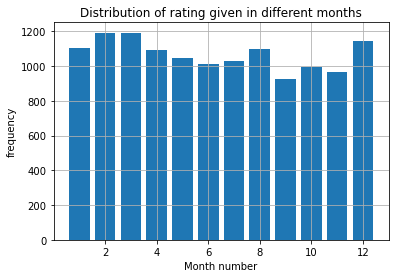

In [1031]:
# plotting distribution
plt.figure()
plt.bar(not_new['month_of_review'].value_counts().index,
        not_new['month_of_review'].value_counts().values)
plt.xlabel('Month number')
plt.ylabel('frequency')
plt.title('Distribution of rating given in different months')
plt.grid()
plt.show()

From the above graph it can be seen that most number of reviews were made in the winter season, which could be assumed that people were travelling more in winters which is weird.

Let's divide the months into 3 categories of 4 months, winter, summer and fall.

In [1065]:
# loading the dataset
hotel_df = pd.read_csv('clean_train_dataframe.csv')

In [1066]:
hotel_df['month_of_review'] = hotel_df['month_of_review'].astype('str')

In [1067]:
hotel_df['month_of_review'].value_counts()

3     1192
2     1192
12    1146
1     1105
8     1097
4     1095
5     1049
7     1030
6     1011
10     992
11     965
9      924
Name: month_of_review, dtype: int64

Considering winter as 0, summer as 1 and fall as 2.

In [1068]:
x = {'1':'0', '2':'0', '3':'0','4':'0', '5':'1', '6':'1', '7':'1', '8':'1','9':'2', '10':'2', '11':'2', '12':'2'}

hotel_df['month_of_review'] = hotel_df['month_of_review'].map(x)

In [1069]:
hotel_df['month_of_review'].value_counts()

0    4584
1    4187
2    4027
Name: month_of_review, dtype: int64

In [1070]:
hotel_df = hotel_df.rename(columns={'month_of_review': 'season_of_review'})

In [1071]:
# sanity check
hotel_df['season_of_review'].value_counts()

0    4584
1    4187
2    4027
Name: season_of_review, dtype: int64

In [1073]:
hotel_df['season_of_review'] = hotel_df['season_of_review'].astype(int)

From above we can see that most of the ratings were given in the month of winter and it keeps on decreasing through the whole year.

Important thing to note here is that feature engineering involves a lot of types like new columns can be made or change of the existing column can be done like as we did.

As test set is different from the train set, let's transform the `month_of_review`column to `season_of_review` column.

In [1074]:
# loading the dataset
test_df = pd.read_csv('clean_test_dataframe.csv')

In [1075]:
test_df['month_of_review'] = test_df['month_of_review'].astype('str')

In [1076]:
x = {'1':'0', '2':'0', '3':'0','4':'0', '5':'1', '6':'1', '7':'1', '8':'1','9':'2', '10':'2', '11':'2', '12':'2'}

test_df['month_of_review'] = test_df['month_of_review'].map(x)

In [1077]:
test_df = test_df.rename(columns={'month_of_review': 'season_of_review'})

In [1078]:
# sanity check
test_df['season_of_review'].value_counts()

0    1524
1    1417
2    1326
Name: season_of_review, dtype: int64

In [1079]:
test_df['season_of_review'] = test_df['season_of_review'].astype(int)

New feature, that is, `season_of_review` is created and let's test this on our model and see the accuracy.


---

#### Question 6.b Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?
<a class ='anchor' id = 'Que6.b' ></a>

In [1080]:
# takeing 60% sample from the dataset
hotel2_df = hotel_df.sample(frac=0.6, random_state=1)

In [1081]:
# instantiating our independent and dependent variables 
X_train = hotel2_df.drop(columns="rating")
y_train = hotel2_df["rating"]

In [1082]:
# instantiating our independent and dependent variables 
X_test = test_df.drop(columns="rating")
y_test = test_df["rating"]

Our sets are ready for scaling and modelling.

To calculate the right hyperparameter for this model, split of train set is needed to remainder and validation sets.

In [1083]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_remainder, X_validation, y_remainder, y_validation = train_test_split(X_train, y_train, test_size=0.40, random_state=1, stratify=y_train)

In [1084]:
X_remainder.shape

(4607, 2743)

In [1085]:
X_validation.shape

(3072, 2743)

In [1086]:
# scale the data 
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_remainder_ss = SS.fit_transform(X_remainder)
X_validation_ss = SS.transform(X_validation)

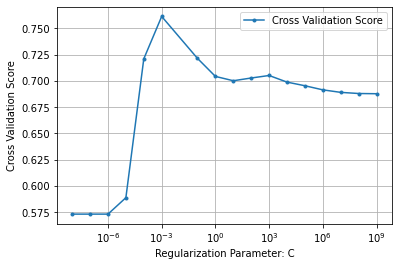

In [1061]:
#Store the results
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder_ss, y_remainder, cv = 5))
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

Best C: 0.001

Now let's test this on the main dataset and check the accuracy on the test set.

In [1087]:
# instantiating our independent and dependent variables 
X_train = hotel_df.drop(columns="rating")
y_train = hotel_df["rating"]

In [1088]:
# scale the data 
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

In [1089]:
# Fitting a model with C=0.001
logreg = LogisticRegression(solver='lbfgs', C=0.001)
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Accuracy score of the TRAIN set: {logreg.score(X_train_ss, y_train)}")
print(f"Accuracy score of the TEST set: {logreg.score(X_test_ss, y_test)}")

Accuracy score of the TRAIN set: 0.853258321612752
Accuracy score of the TEST set: 0.777126786969768


Unfortunately, our accuracies don't change that much and infact both test and train accuracies got decreased by smal 10^(-3) margins.

---

### SUMMARY:
<a class ='anchor' id = 'summary' ></a>

The best model so far created is the logistic regression model with c value of 0.001 as done in que5a. However, other models can be improved with continuous tuning of hyperparameters on the validation sets. Also decision tree model is fastest of all, but also depends on the number of hyperparameters used.

__The highest accuracy achieved by `logreg` model is 77.759%__

---

### THANK YOU!!